In [26]:
def solution(a, b, la, lb, lc):
    plt.figure(figsize=(6, 6))

    # x-lim and y-lim
    lim = [-7, 7]
    plt.xlim(*lim) 
    plt.ylim(*lim)
    plt.grid() # grid on the plot

    L = np.array([-2, -1]) # distance between servo
    O = np.array([0, 0]) # start point

    H1 = H(5*np.pi/4 + b, *L)
    H2 = H(3*np.pi/4 - a - b, lb, 0)
    H3 = H(0, lc, 0)

    H12 = np.matmul(H1, H2)
    H123 = np.matmul(H12, H3)


    # Draw solution
    plt.quiver(*O, *H123[:2, 2], color='c', scale_units='xy', angles='xy', scale=1) # FK solution
    
    
    plt.quiver(*O, *L, color='y', hatch='|', scale_units='xy', angles='xy', scale=1) # servo vector


    plt.quiver(*O, *(-la * H12[:2,0]), color='y', hatch='*', scale_units='xy', angles='xy', scale=1) # 1 link
    plt.quiver(*H12[:2, 2], *(-la * H12[:2,0]), color='y', hatch='*', scale_units='xy', angles='xy', scale=1) # 1' link
    plt.quiver(*(-la * H12[:2,0]), *H12[:2, 2], color='m', hatch='*', scale_units='xy', angles='xy', scale=1) # link between 1 and 1'
    plt.quiver(*L, *(lb * H1[:2,0]), color='r', scale_units='xy', angles='xy', scale=1) # 2 link
    plt.quiver(*H12[:2, 2], *(lc * H12[:2,0]), color='g', scale_units='xy', angles='xy', scale=1) # 3 link


    plt.quiver(*np.array([L, L]).T, *H1[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # base frame
    plt.quiver(*np.array([H12[:2, 2], H12[:2, 2]]).T, *H12[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # second frame
    plt.quiver(*np.array([H123[:2, 2], H123[:2, 2]]).T, *H123[:2, :2], color='k', scale_units='xy', scale=1) # third frame

    plt.scatter(*np.array([O, L, H12[:2, 2], H123[:2, 2]]).T, c=['y', 'r', 'g', 'b'])
    
    print(H123[:2, 2])



In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
def H(ang: float, dx: int, dy: int) -> np.array:
    return np.array([
        [np.cos(ang), -np.sin(ang), dx],
        [np.sin(ang), np.cos(ang), dy],
        [0, 0, 1],
    ])

In [29]:
a = 0 # servo one rotation
b = 0 # servo two rotation
L = np.array([-2, -1]) # distance between servo
la =  2 # 1 link
lb =  3 # 2 link
lc =  5 # 3 link
O = np.array([0, 0]) # start point

# FK

# 1

In [88]:
H1 = H(5*np.pi/4solution(a, b, la, lb, lc) + b, *L)
H2 = H(3*np.pi/4 - a - b, lb, 0)
H3 = H(0, lc, 0)

H12 = np.matmul(H1, H2)
H123 = np.matmul(H12, H3)

[ 0.87867966 -3.12132034]


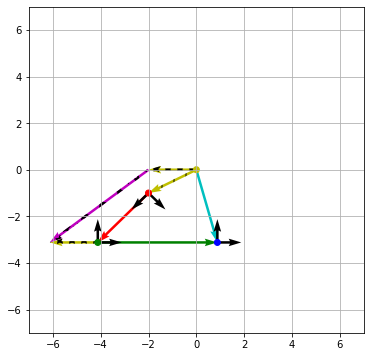

In [107]:
solution(a, b, la, lb, lc)

In [32]:
k = 10
la =  24/k # 1 link
lb =  100/k # 2 link
lc =  120/k # 3 link
L = np.array([-20, -22])/k # distance between servo

# 2

In [19]:
def A(ang: float) -> np.array:
    return np.array([
        [np.cos(ang), -np.sin(ang)],
        [np.sin(ang), np.cos(ang)]
    ])


def FK(a: float, b:float) -> np.array:
    I = np.array([1, 0])
    Lc = np.matmul(A(-a), lc * I)
    Lb = np.matmul(A(5*np.pi/4+b), lb * I)
    
    L = np.array([-20, -22]) # distance between servo
    
    solution = L + Lc + Lb
    
    return  solution


In [24]:
a, b = np.pi/3, 0

fk_ = np.array([
    [L[0], lc*np.cos(a), lb*np.cos(5*np.pi/4 + b)], 
    [L[1], -lc*np.sin(a), lb*np.sin(5*np.pi/4 + b)]
])

fk_, FK(a, b)

(array([[ -20.        ,   60.        ,  -70.71067812],
        [ -22.        , -103.92304845,  -70.71067812]]),
 array([ -30.71067812, -196.63372657]))

In [91]:
x, y = Lo
x, y

(0.8786796564403572, -3.1213203435596424)

[  2.9595426  -10.60324496]


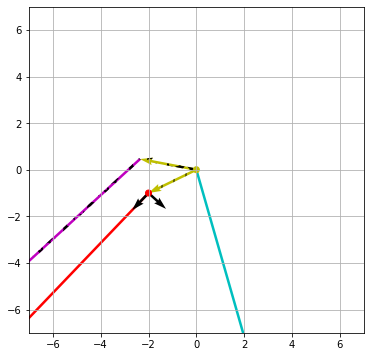

In [33]:
solution(np.radians(11), np.radians(2), la, lb, lc)

In [34]:
k = 1
la =  24/k # 1 link
lb =  100/k # 2 link
lc =  120/k # 3 link
L = np.array([-20, -22])/k # distance between servo
x, y = 0, -150

In [35]:
delta = ((x - L[0])**2 + (y - L[1])**2)**0.5
gama = np.math.acos((x - L[0]) / delta) # np.abs(np.math.atan((y - L[1]) / (x - L[0])))
teta = np.math.acos( (lb**2 - lc**2 + delta**2) / (2*lb*delta) )
ksi = np.math.acos( (lb**2 + lc**2 - delta**2) / (2*lb*lc) )
beta = 3*np.pi/4 - teta - gama
alpha = ksi + teta + gama - np.pi

In [36]:
np.rad2deg(alpha), np.rad2deg(beta)

(34.065955999973546, -7.567688610207652)

[-1.  -7.4]


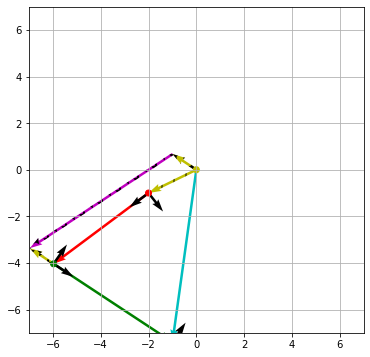

In [37]:
solution(alpha, beta, la/20, lb/20, lc/20)

# IK

In [34]:
x, y = H123[:2, 2]

In [35]:
delta = (x - L[0])**2 + (y - L[1])**2
gama = np.math.atan2((y - L[1]), (x - L[0]))

phi = np.math.acos((lc**2 - lb**2 - delta) / (2*lb*(delta**0.5)))

phi11 = gama + phi
phi12 = gama - phi

phi21 = np.math.atan2((y - L[1] - lb*np.math.sin(phi11)), (x - L[0] - lb*np.math.cos(phi11))) - phi11
phi22 = np.math.atan2((y - L[1] - lb*np.math.sin(phi12)), (x - L[0] - lb*np.math.cos(phi12))) - phi12

In [36]:
b1 = phi11 - 5*np.pi/4
b2 = phi12 - 5*np.pi/4

a1 = 2*np.pi - phi21 - phi11
a2 = 2*np.pi - phi22 - phi12

# Error 

In [37]:
np.abs(a1 - a), np.abs(a2 - a), np.abs(b1 - b), np.abs(b2 - b)

(7.677331047051564, 6.159177673558279, 3.141592653589793, 5.982527086635361)

In [ ]:
phi11 - a, phi21 - b